# Bank Customer Chun Prediction



In this project, we use supervised learning models to identify customers who are likely to churn in the future and what variables would play an important role affecting the churn. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

**Independent Variables:**

RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Predicted Variables:**

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Part 0: Data loading

In [1]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [2]:
#link = '/content/drive/MyDrive/Colab Notebooks/Bank/bank.data.csv'
#_, id = link.split('=')
#file = drive.CreateFile({'id':id}) 
#file.GetContentFile('bank_churn.csv') 
downloaded = drive.CreateFile({'id':"1jpiCHug5ZIkgnNqKL2ouKj4ZxKGOkEvX"})   # replace the id with id of file you want to access
downloaded.GetContentFile('bank.data.csv')      

In [54]:
import pandas as pd
bank_df = pd.read_csv('bank.data.csv')

In [53]:
bank_df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [5]:
bank_df.shape

(10000, 14)

10,000 rows of customer information, 14 variables

## Part 1: Data Exploration



In [38]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Surname            10000 non-null  object 
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Gender_Female      10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
 12  Geography_France   10000 non-null  uint8  
 13  Geography_Germany  10000 non-null  uint8  
 14  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), object(1), uint8(5)
memory usage: 830.2+ KB


In [39]:
#check missing values
bank_df.isnull().sum()

Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Female        0
Gender_Male          0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [40]:
# Get unique count for each variable
bank_df.nunique()

Surname              2932
CreditScore           460
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Gender_Female           2
Gender_Male             2
Geography_France        2
Geography_Germany       2
Geography_Spain         2
dtype: int64

In [52]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
bank_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [42]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Get target variable
y = bank_df['Exited']

In [44]:
y.shape


(10000,)

In [45]:
# check the propotion of y = 1
# python package: imbalance-learn
print(y.sum() / y.shape * 100)

[20.37]


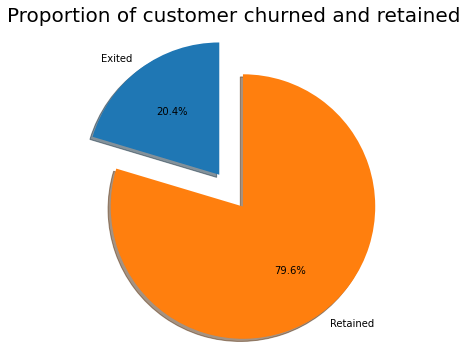

In [46]:
labels = 'Exited', 'Retained'
sizes = [bank_df.Exited[bank_df['Exited']==1].count(), bank_df.Exited[bank_df['Exited']==0].count()]
explode = (0, 0.3)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [47]:
# The amount of female and male churned according to the geography variable
cl=['Gender','Geography','Exited']


bank_df[cl].groupby(['Gender','Geography']).sum()

KeyError: ignored

Most customers who are female have a big posibility to churn.

In [48]:
bank_df[cl].groupby(['Gender','Geography']).count()

KeyError: ignored

Text(0.5, 1.0, 'EstimatedSalary')

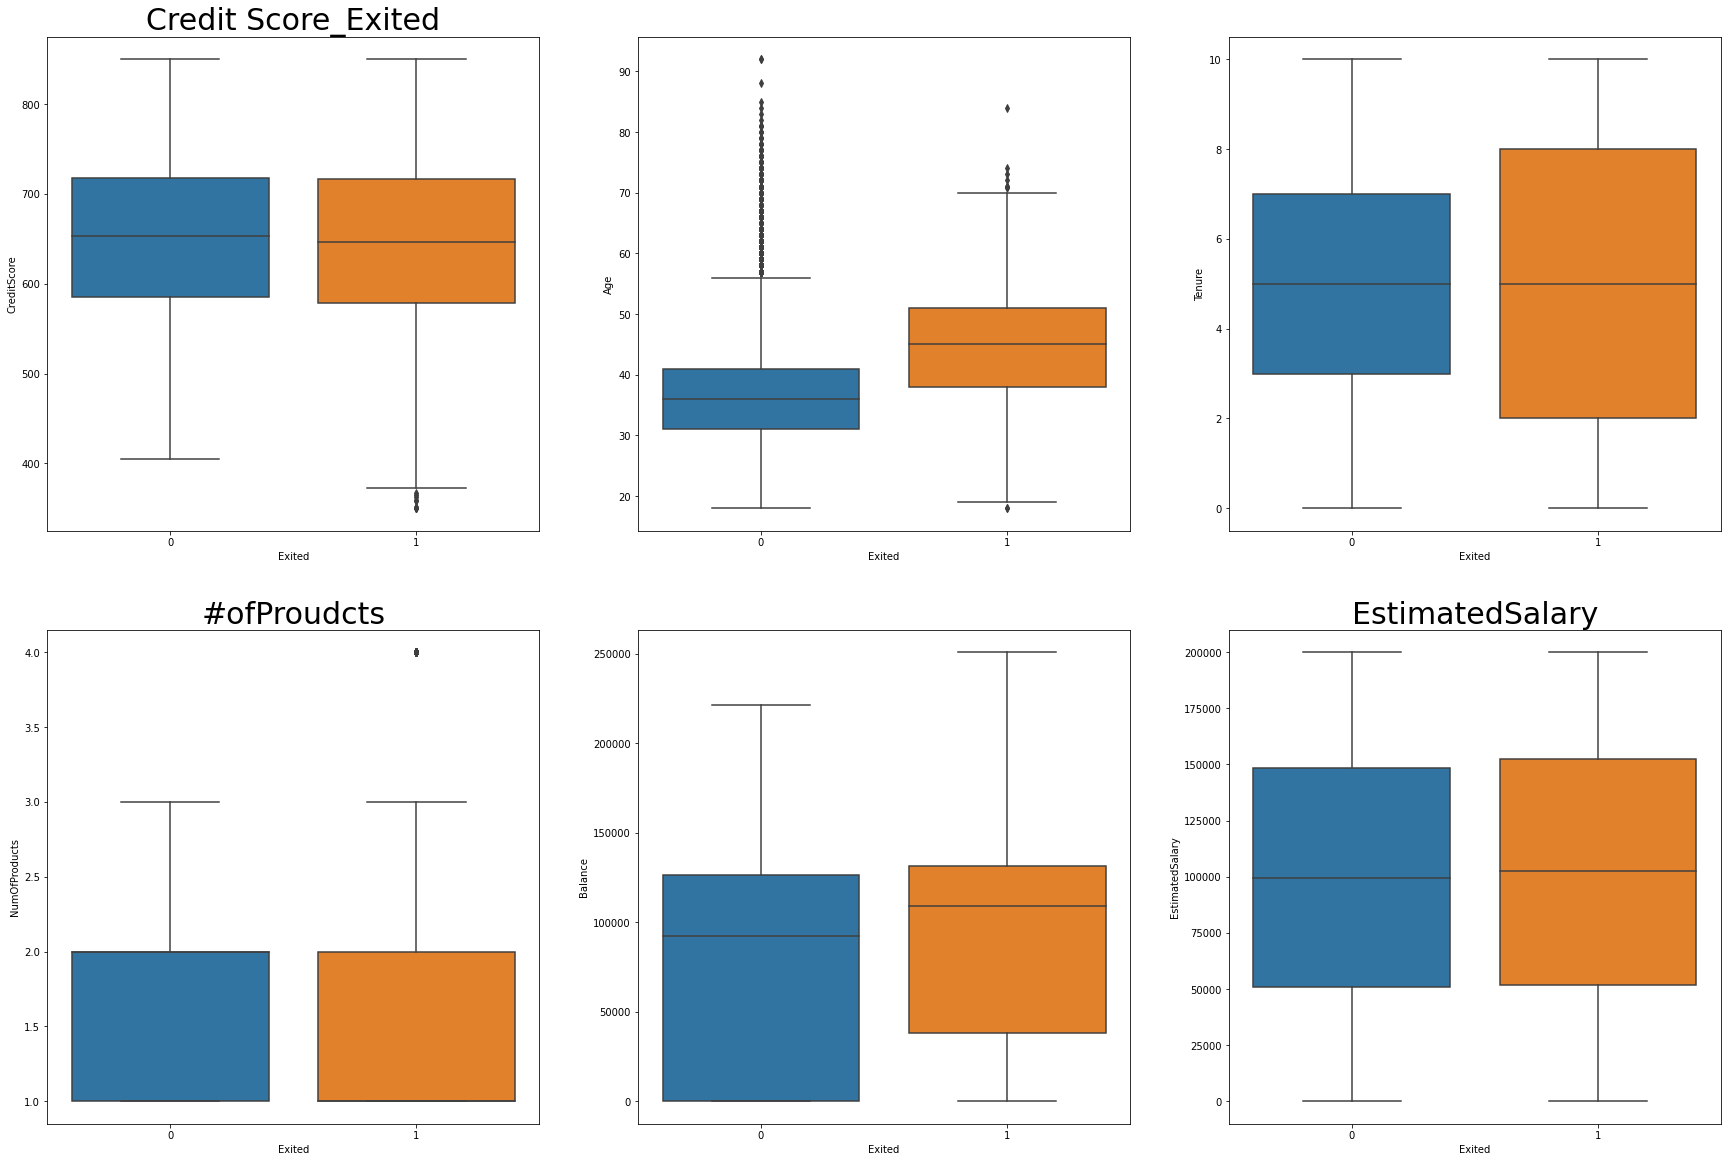

In [49]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[30,20])
sns.boxplot(x='Exited', y ='CreditScore', data=bank_df, ax=axss[0][0]).set_title('Credit Score_Exited',size=30)
sns.boxplot(x='Exited', y ='Age', data=bank_df, ax=axss[0][1]).set_title('Age_Exited',size=30,color='w')
sns.boxplot(x='Exited', y ='Tenure', data=bank_df, ax=axss[0][2]).set_title('Tenure_Exited',size=30,color='w')
sns.boxplot(x='Exited', y ='NumOfProducts', data=bank_df, ax=axss[1][0]).set_title('#ofProudcts',size=30)
sns.boxplot(x='Exited', y ='Balance', data=bank_df, ax=axss[1][1]).set_title("Balence",size=30,color='w')
sns.boxplot(x='Exited', y ='EstimatedSalary', data=bank_df, ax=axss[1][2]).set_title("EstimatedSalary",size=30)

ValueError: ignored

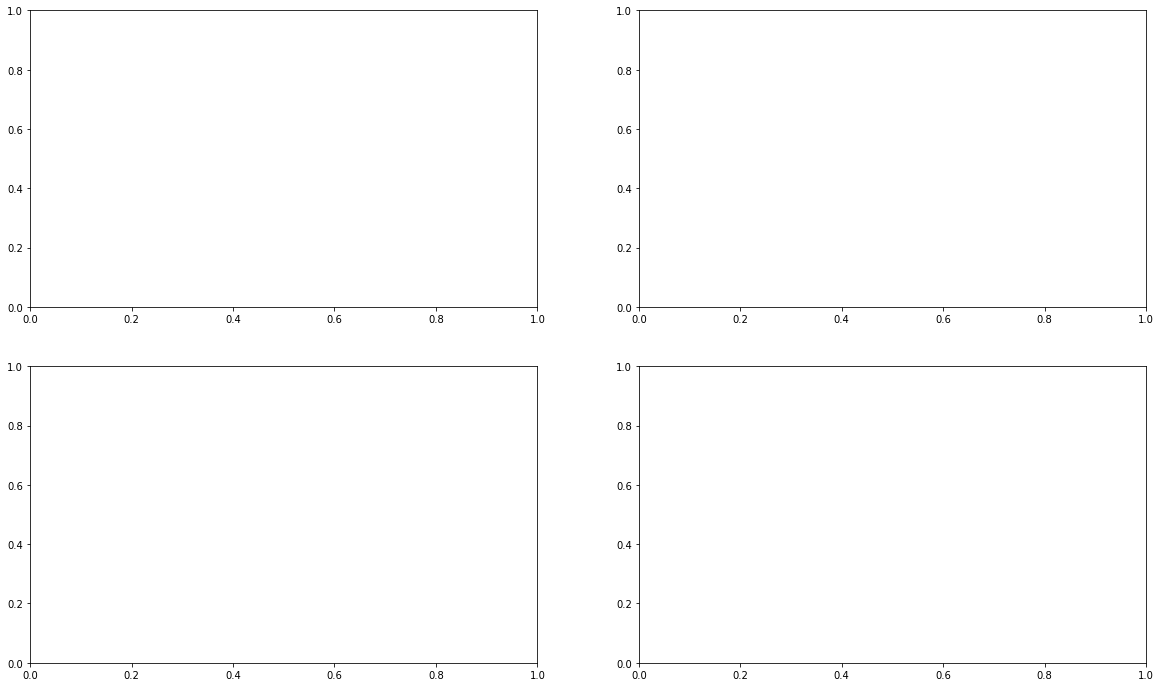

In [51]:
  # See the Exited status with categorical variables
_,axarr= plt.subplots(2,2, figsize=[20,12])
sns.countplot(x='Geography', hue = 'Exited',data =bank_df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = bank_df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank_df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_df, ax=axarr[1][1])

We note the following:


*   Majority of data is from France

*   Active Members would be less likely to churn,while customers who hold credit cards are more likely to churn.

*   The older the customer is, the greater the chance is to churn.


*   The proportion of female customers churning is also greater than that of male customers.


*   The customers whose account having 0 balance are likely to retain,while the customers who having more than 20,000 balance are more likely to churn, which may be an issue for the bank reserving the capital for lending.


*   The tenure is not the gurantee for logal customers to retain. Customers who churned have a bigger range of the tenure.(from 2 to 8 years)


*   Neither the product nor the salary has a significant effect on the likelihood to churn.

*  The overall proportion of inactive mebers is quite high. The bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

**Suggestion**
*   The bank should develop the better sales strategy to balance the short-term profits v.s long-time client lifetime value.




In [55]:
display(pd.crosstab(bank_df["Exited"], bank_df["Geography"], margins=True, normalize=False))
display(pd.crosstab(bank_df["Exited"], bank_df["Geography"], margins=True, normalize=True))


Geography,France,Germany,Spain,All
Exited,,,,
0,4204,1695,2064,7963
1,810,814,413,2037
All,5014,2509,2477,10000


Geography,France,Germany,Spain,All
Exited,,,,
0,0.4204,0.1695,0.2064,0.7963
1,0.0810,0.0814,0.0413,0.2037
All,0.5014,0.2509,0.2477,1.0000


In [56]:
display(pd.crosstab(bank_df["Exited"],[bank_df["Gender"],bank_df["Geography"]], margins=True, normalize=False))
display(pd.crosstab(bank_df["Exited"],bank_df["Gender"], margins=True, normalize=True))

Gender    Female                 Male                  All
Geography France Germany Spain France Germany Spain       
Exited                                                    
0           1801     745   858   2403     950  1206   7963
1            460     448   231    350     366   182   2037
All         2261    1193  1089   2753    1316  1388  10000

Gender,Female,Male,All
Exited,,,
0,0.3404,0.4559,0.7963
1,0.1139,0.0898,0.2037
All,0.4543,0.5457,1.0000


In [57]:
display(pd.crosstab(bank_df["Exited"], bank_df["HasCrCard"], margins=True, normalize=False))
display(pd.crosstab(bank_df["Exited"], bank_df["HasCrCard"], margins=True, normalize=True))

HasCrCard,0,1,All
Exited,,,
0,2332,5631,7963
1,613,1424,2037
All,2945,7055,10000


HasCrCard,0,1,All
Exited,,,
0,0.2332,0.5631,0.7963
1,0.0613,0.1424,0.2037
All,0.2945,0.7055,1.0000


In [58]:
display(pd.crosstab(bank_df["Exited"], bank_df["IsActiveMember"], margins=True, normalize=False))
display(pd.crosstab(bank_df["Exited"], bank_df["IsActiveMember"], margins=True, normalize=True))

IsActiveMember,0,1,All
Exited,,,
0,3547,4416,7963
1,1302,735,2037
All,4849,5151,10000


IsActiveMember,0,1,All
Exited,,,
0,0.3547,0.4416,0.7963
1,0.1302,0.0735,0.2037
All,0.4849,0.5151,1.0000


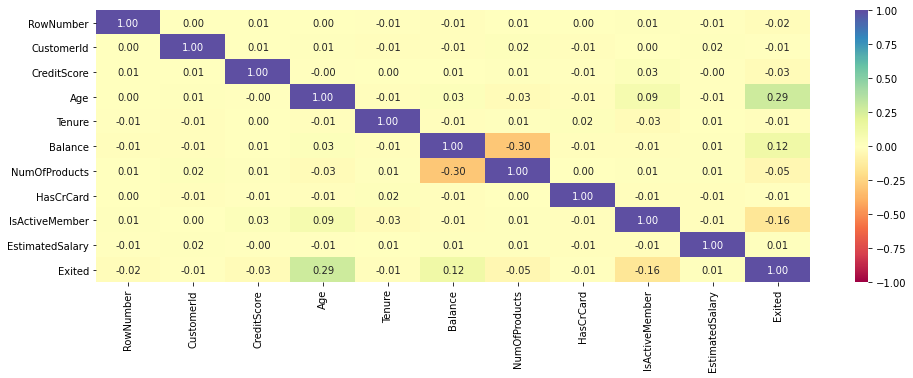

In [59]:
plt.figure(figsize=(16,5));
sns.heatmap(bank_df.corr(), annot=True, fmt=".2f", vmin=-1.0, vmax=1, cmap="Spectral");

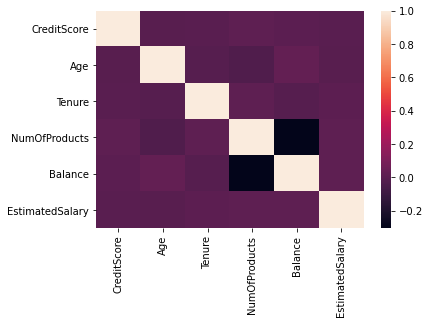

In [60]:
# correlations between features
corr_score = bank_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [61]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


## Part 2: Feature Preprocessing

feature encoding, feature scaling

In [62]:
# one hot encoding
bank_df= pd.get_dummies(bank_df,columns=['Gender'],drop_first=False).iloc[:, 1:]                    

In [63]:
# one hot encoding
bank_df=pd.get_dummies(bank_df,columns=['Geography'], drop_first=False).iloc[:, 1:]

In [64]:
bank_df.head(10)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,Chu,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
7,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0
8,He,501,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,H?,684,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0


In [65]:
# Get feature space by dropping useless feature
to_drop = ['Surname','Exited']
X = bank_df.drop(to_drop, axis=1)

In [66]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


## Part 3: Model Training and Result Evaluation

## Part 3.1: Split dataset

In [67]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 13 features
test data has 2500 observation with 13 features


In [70]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]



# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data



# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Part 3.2: Model Training and Selection

In [75]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()
# Decision Tree
classifier_CART=DecisionTreeClassifier()

In [76]:
# Train the model
M1=classifier_logistic.fit(X_train, y_train)
M1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
M2=classifier_KNN.fit(X_train, y_train)
M2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
M3=classifier_RF.fit(X_train, y_train)
M3

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
M4=classifier_CART.fit(X_train,y_train)
M4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
# Accuracy of test data
print("LG accuracy is", classifier_logistic.score(X_test, y_test))
print("RF accuracy is", classifier_RF.score(X_test,y_test))
print("KNN accuracy is", classifier_KNN.score(X_test,y_test))
print("CART accuracy is",classifier_CART.score(X_test,y_test))

LG accuracy is 0.808
RF accuracy is 0.8592
KNN accuracy is 0.826
CART accuracy is 0.7856


In [82]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','CART']
model_list = [classifier_logistic, classifier_KNN, classifier_RF,classifier_CART]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.826      0.83533333 0.81466667 0.82333333 0.83066667]
Model accuracy of KNN is 0.826
[0.87466667 0.86066667 0.85333333 0.85666667 0.86466667]
Model accuracy of Random Forest is 0.8619999999999999
[0.796      0.806      0.788      0.79866667 0.80533333]
Model accuracy of CART is 0.7988000000000001


##Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)



Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users.
Precision of the Churn class measures how often the model catches an actual Churn case, while also factoring in how often it misclassifies a Non-Churn case as a Churn case. In this case, a Churn Precision is not a problem because there are no significant consequences of identifying a customer as a Churn risk when she isn’t. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.
A Churn class Recall means that the model was able to catch % of the actual Churn cases. This is the measure we really care about, because we want to miss as few of the true Churn cases as possible.

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.8592
precision is: 0.775438596491228
recall is: 0.43418467583497056


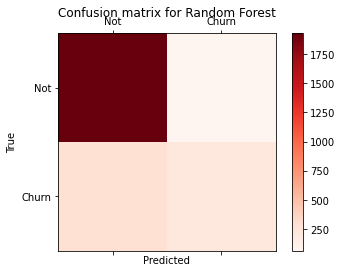

Logistic Regression
Accuracy is: 0.808
precision is: 0.5857988165680473
recall is: 0.1944990176817289


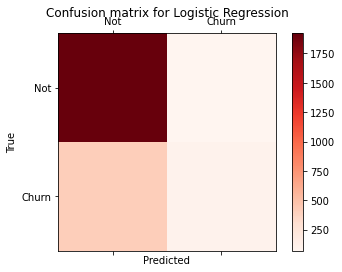

K nearest neighbor
Accuracy is: 0.826
precision is: 0.6275862068965518
recall is: 0.3575638506876228


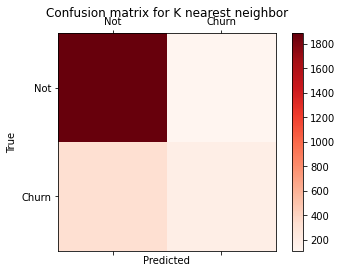

CART
Accuracy is: 0.7856
precision is: 0.47398843930635837
recall is: 0.48330058939096265


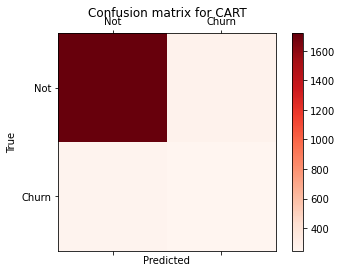

In [84]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
("Random Forest", confusion_matrix(y_test,M3.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,M1.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test,M2.predict(X_test))),
    ("CART", confusion_matrix(y_test,M4.predict(X_test)))

]

draw_confusion_matrices(confusion_matrices)

Predicted     0   1
Actual             
0          1921  70
1           410  99, 



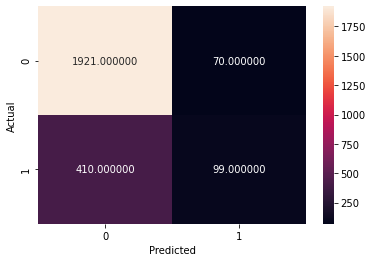

In [ ]:
LG_CM=(pd.crosstab(y_test,M1.predict(X_test),rownames=['Actual'],colnames=['Predicted']))

LG_CM
print(f"{LG_CM}, \n")
sns.heatmap(LG_CM,annot=True, fmt='0f')

In [ ]:
LG_CM=('LG',
       confusion_matrix(y_test,M1.predict(X_test)))
LG_CM

('LG', array([[1921,   70],
        [ 410,   99]]))

Predicted     0    1
Actual              
0          1883  108
1           327  182, 



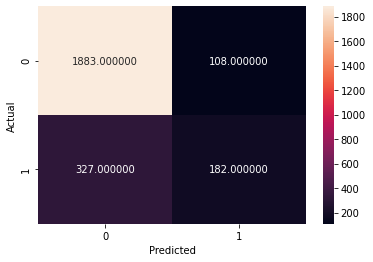

In [ ]:
KNN_CM=(pd.crosstab(y_test,M2.predict(X_test),rownames=['Actual'],colnames=['Predicted']))

KNN_CM
print(f"{KNN_CM}, \n")
sns.heatmap(KNN_CM,annot=True, fmt='0f')

Predicted     0    1
Actual              
0          1927   64
1           286  223, 



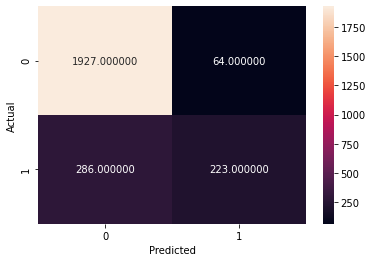

In [ ]:
RF_CM=(pd.crosstab(y_test,M3.predict(X_test),rownames=['Actual'],colnames=['Predicted']))

RF_CM
print(f"{RF_CM}, \n")
sns.heatmap(RF_CM,annot=True, fmt='0f')

## Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [86]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = M3.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)


In [87]:
M3.predict_proba(X_test)

array([[0.78, 0.22],
       [0.96, 0.04],
       [0.77, 0.23],
       ...,
       [0.82, 0.18],
       [0.95, 0.05],
       [0.95, 0.05]])

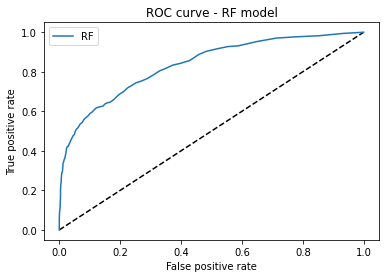

In [88]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [89]:
from sklearn import metrics

# AUC score
print("AUC of RF is ", metrics.auc(fpr_rf,tpr_rf))

AUC of RF is  0.8353795419268832


#### Part 3.4.1: ROC of LR Model

In [90]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = M1.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [91]:
M1.predict_proba(X_test)

array([[0.82468423, 0.17531577],
       [0.93221356, 0.06778644],
       [0.85516475, 0.14483525],
       ...,
       [0.71423485, 0.28576515],
       [0.89320837, 0.10679163],
       [0.85570288, 0.14429712]])

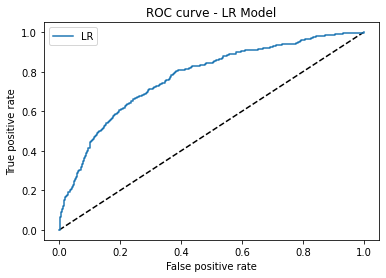

In [92]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [93]:
# AUC score
print("AUC of LR is ", metrics.auc(fpr_lr,tpr_lr))

AUC of LR is  0.7722274794532172


#### Part 3.4.1: ROC of KNN Model

In [94]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = M2.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thres = roc_curve(y_test, y_pred_knn)

In [95]:
M2.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

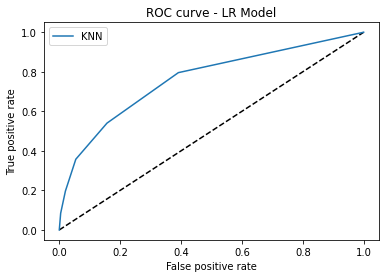

In [96]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [97]:
# AUC score
print("AUC of KNN is ", metrics.auc(fpr_knn,tpr_knn))

AUC of KNN is  0.7610632916888277


### Part 3.4.1: ROC of CART Model

In [98]:
# Use predict_proba to get the probability results of CART
y_pred_CART = M4.predict_proba(X_test)[:, 1]
fpr_cart, tpr_cart, thres = roc_curve(y_test, y_pred_CART)

In [99]:
M4.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

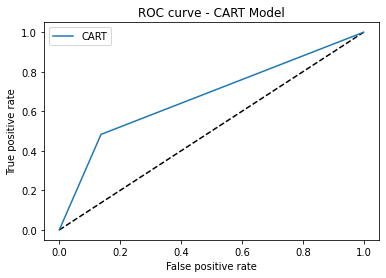

In [100]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cart, tpr_cart, label='CART')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - CART Model')
plt.legend(loc='best')
plt.show()

In [101]:
# AUC score
print("AUC of CART is ", metrics.auc(fpr_cart,tpr_cart))

AUC of CART is  0.6730917813855867


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [106]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))


# evaluate each model in turn
results = []
names = []


In [107]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.808000)
KNN: (0.826000)
CART: (0.789200)
RF: (0.861200)
SVM: (0.856000)
XGB: (0.861200)
LightGBM: (0.861200)


# Part 4: Feature Importance

The corelated features that we are interested in

#  Variable Importance Levels of All Models



In [ ]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))


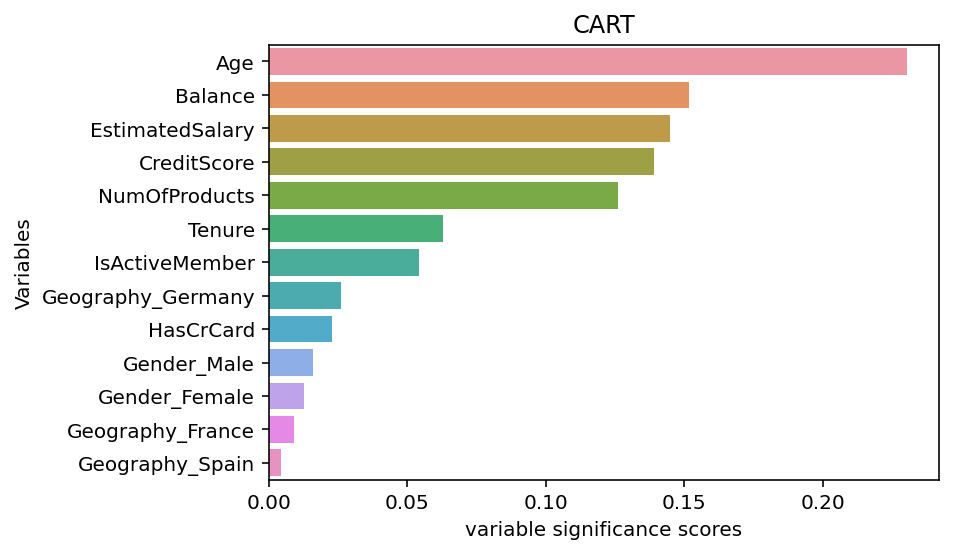

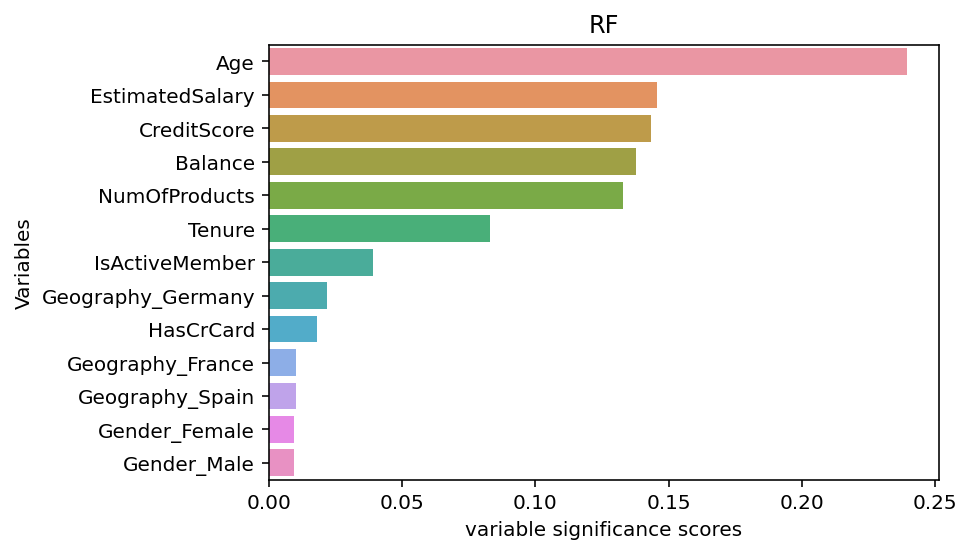

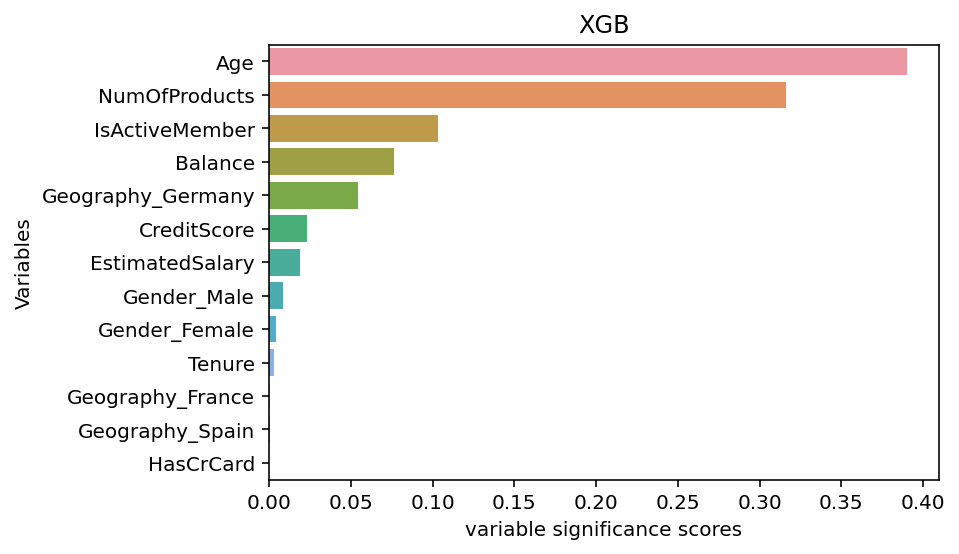

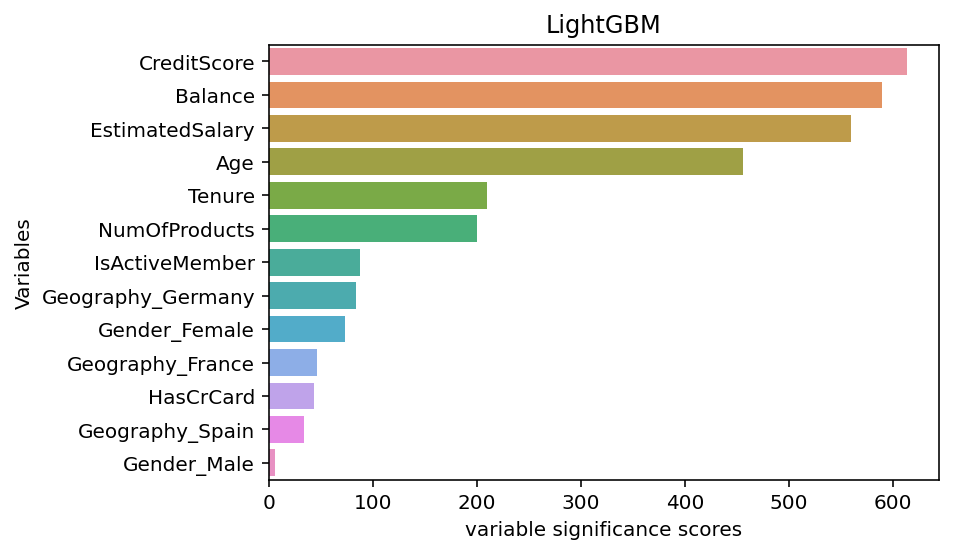

In [ ]:

import matplotlib.pyplot as plt
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
  

        chart=sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('variable significance scores')
        plt.ylabel('Variables')
        plt.title(name)
        
     
        plt.show()

In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2384
EstimatedSalary : 0.1477
CreditScore : 0.1435
Balance : 0.1398
NumOfProducts : 0.1303
Tenure : 0.0834
IsActiveMember : 0.0405
Geography_Germany : 0.0207
HasCrCard : 0.0185
Geography_France : 0.01
Geography_Spain : 0.0098
Gender_Female : 0.0089
Gender_Male : 0.0087


In [ ]:
# check feature importance of Decision Tree for feature selection
DT = DecisionTreeClassifier()
DT.fit(X, y)

importances = DT.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by DT Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by DT Model:
Age : 0.2313
EstimatedSalary : 0.1542
CreditScore : 0.1411
Balance : 0.1402
NumOfProducts : 0.1192
Tenure : 0.0799
IsActiveMember : 0.0573
Geography_Germany : 0.0216
HasCrCard : 0.0156
Gender_Male : 0.0129
Gender_Female : 0.0099
Geography_France : 0.0093
Geography_Spain : 0.0076


In [ ]:
# check feature importance of GB for feature selection
GB = GradientBoostingClassifier()
GB.fit(X, y)

importances = GB.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by GB Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by GB Model:
Age : 0.397
NumOfProducts : 0.3069
IsActiveMember : 0.117
Balance : 0.0823
Geography_Germany : 0.0478
CreditScore : 0.017
EstimatedSalary : 0.013
Gender_Female : 0.0086
Gender_Male : 0.0061
Tenure : 0.0028
Geography_France : 0.0011
HasCrCard : 0.0003
Geography_Spain : 0.0001


Conclusion: 



*  In general, Random Forest model has the higher  
accuracy 86% while also keeps 46% recall rate. A Churn class Recall means that the model was able to catch 46% of the actual Churn cases. This is the measure we really care about, because we want to miss as few of the true Churn cases as possible.


*  Regarding AUC, Raondom Forest model has 76%, which indicates the model having 76 % to distinglish customer churn or no churn.

*   The top 3 key factors would influence customer churn are Age, Estimate Salary, and Credit Score.


